#### Q-8. Quora question pair similarity, you need to find the Similarity between two questions by mapping the words in the questions using TF-IDF, and using a supervised Algorithm you need to find the similarity between the questions.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [27]:
df.shape, new_df.shape


((404290, 6), (30000, 6))

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [29]:
new_df.isnull().sum().sum()

0

In [30]:
new_df['is_duplicate'].value_counts()

is_duplicate
0    19013
1    10987
Name: count, dtype: int64

In [31]:
new_df.duplicated().sum()

0

In [32]:
(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100

is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

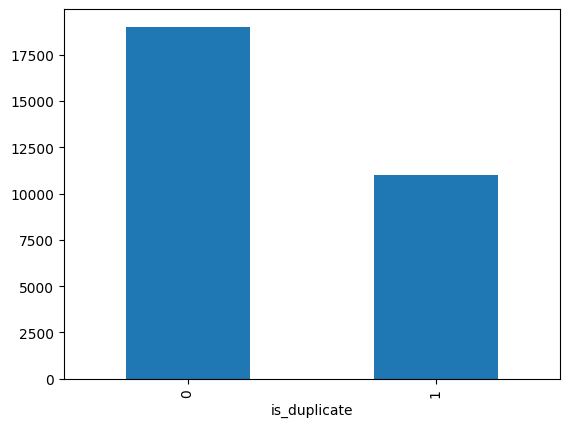

In [33]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [34]:
# Remove any rows with missing values
df = df.dropna()

# Split the dataset into input features (questions) and target variable (similarity label)
questions = df[['question1', 'question2']]
labels = df['is_duplicate']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

In [36]:
# Apply TF-IDF vectorization on the training data

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['question1'] + ' ' + X_train['question2'])

In [37]:
# Train a supervised algorithm (e.g., Logistic Regression) on the TF-IDF features

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [38]:
# Apply TF-IDF vectorization on the testing data

X_test_tfidf = vectorizer.transform(X_test['question1'] + ' ' + X_test['question2'])

# Predict the similarity labels for the testing data

y_pred = model.predict(X_test_tfidf)

In [39]:
# Calculate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7550644339459299
